In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import numpy as np
import os
from PIL import Image

%matplotlib inline
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [3]:
def load_dataset():
    scaled_train_dir = "scaled_chest_xray/train/"
    scaled_test_dir = "scaled_chest_xray/test/"

    scaled_train_pneu = os.listdir(os.path.join(scaled_train_dir, 'PNEUMONIA'))
    scaled_train_normal = os.listdir(os.path.join(scaled_train_dir, 'NORMAL'))
    scaled_test_pneu = os.listdir(os.path.join(scaled_test_dir, 'PNEUMONIA'))
    scaled_test_normal = os.listdir(os.path.join(scaled_test_dir, 'NORMAL'))

    scaled_train = [('PNEUMONIA/' + name, 1) for name in scaled_train_pneu] + [('NORMAL/' + name, 0) for name in scaled_train_normal]
    scaled_test = [('PNEUMONIA/' + name, 1) for name in scaled_test_pneu] + [('NORMAL/' + name, 0) for name in scaled_test_normal]

    random.seed(1)
    random.shuffle(scaled_train) 
    random.shuffle(scaled_test) 

    # data = np.array(list(Image.open("scaled_chest_xray/train/NORMAL/NORMAL-28501-0001.jpeg").getdata()))
    # print(len(data))
    # print(data)
    # print(type(data))
    
    test_X_list = [list(Image.open(scaled_test_dir + image_path).getdata().convert('L')) for image_path, i in scaled_test]
    test_X_list = [[float(value)/255 for value in image_data] for image_data in test_X_list]

    train_X_list = [list(Image.open(scaled_train_dir + image_path).getdata().convert('L')) for image_path, i in scaled_train]
    train_X_list = [[float(value)/255 for value in image_data] for image_data in train_X_list]

    train_X = np.array(train_X_list, dtype=float)
    test_X = np.array(test_X_list, dtype=float)
    train_Y = np.array([[float(i) for image_path, i in scaled_train]], dtype=float).T
    test_Y = np.array([[float(i) for image_path, i in scaled_test]], dtype=float).T

    return (train_X, train_Y, test_X, test_Y)
    

In [4]:
train_X, train_Y, test_X, test_Y = load_dataset()
#print(train_X[0:3])
#print(train_Y)
print(test_X)
print(test_Y)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.79607843 0.78431373 0.78039216 ... 0.05490196 0.08235294 0.10196078]
 [0.01960784 0.03529412 0.03137255 ... 0.06666667 0.06666667 0.06666667]
 ...
 [0.1254902  0.1254902  0.1254902  ... 0.11372549 0.10588235 0.09803922]
 [0.68235294 0.70980392 0.69019608 ... 0.45098039 0.38823529 0.38431373]
 [0.         0.         0.00784314 ... 0.         0.         0.        ]]
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.

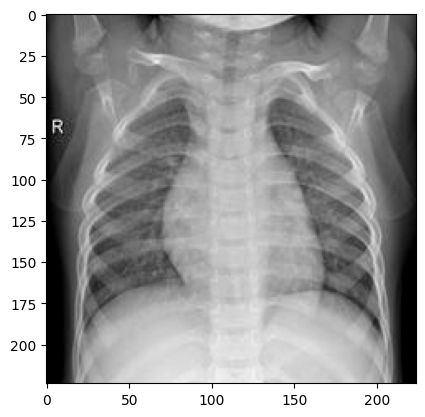

In [5]:
index = 3
plt.imshow(np.reshape(train_X[index], (224,224)), cmap='gray')

In [6]:
tf.random.set_seed(16)
model = keras.models.Sequential([
  keras.layers.Dense(50176, activation='relu'),
  keras.layers.Dropout(0.2),  
  keras.layers.Dense(1, activation='relu'),
  keras.layers.Dense(1)
])
print(tf.config.list_physical_devices('GPU'))

[]


In [13]:
print(train_X[0:1].shape)
predictions = model(train_X[0:1]).numpy()

(1, 50176)


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn(train_Y[:1], predictions).numpy())

0.0


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:

model.fit(train_X, train_Y, epochs=5)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Kevin\AppData\Local\Temp\ipykernel_15624\2605617072.py", line 1, in <module>
      model.fit(train_X, train_Y, epochs=5)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1040]